In [2]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda


plt.style.use(
    "https://raw.githubusercontent.com/sheamusfitz/mpl-styles/main/smallfigs.mplstyle")

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:160: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [3]:
u = mda.Universe('./step5_input.gro', './subsampled-dppc.xtc')

In [98]:
dppc1 = u.select_atoms('resid 1')
# dppc1.positions

In [102]:
np.unique(dppc1.types)

array(['C', 'H', 'N', 'O', 'P'], dtype=object)

In [119]:
dppc_nh = u.select_atoms('resid 1 and not type H')
dppc_h = u.select_atoms('resid 1 and type H')

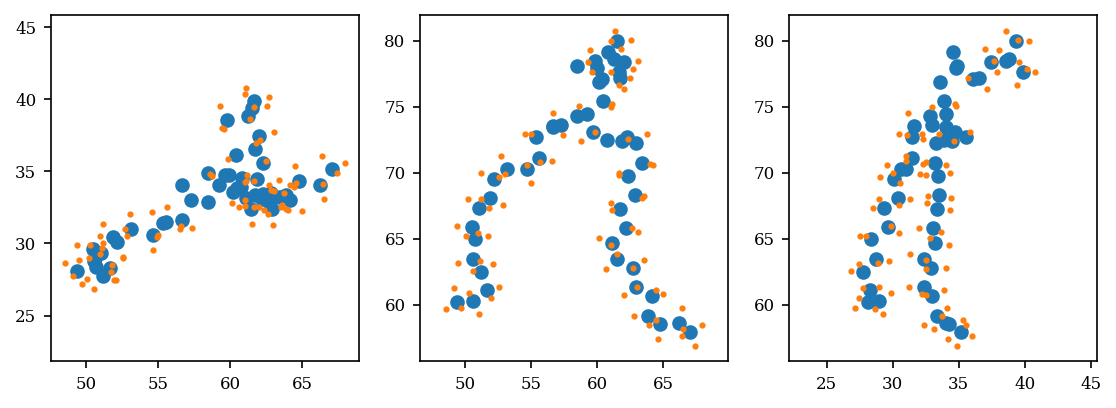

In [120]:
plt.figure(figsize=(9,3))
hsize = 2
plt.subplot(131)
plt.plot(dppc_nh.positions[:, 0], dppc_nh.positions[:, 1], 'o')
plt.plot(dppc_h.positions[:, 0], dppc_h.positions[:, 1], 'o', ms=hsize)
plt.gca().set_aspect('equal', 'datalim')

plt.subplot(132)
plt.plot(dppc_nh.positions[:, 0], dppc_nh.positions[:, 2], 'o')
plt.plot(dppc_h.positions[:, 0], dppc_h.positions[:, 2], 'o', ms=hsize)
plt.gca().set_aspect('equal', 'datalim')

plt.subplot(133)
plt.plot(dppc_nh.positions[:, 1], dppc_nh.positions[:, 2], 'o')
plt.plot(dppc_h.positions[:, 1], dppc_h.positions[:, 2], 'o', ms=hsize)
plt.gca().set_aspect('equal', 'datalim')

plt.show()

C
H
N
O
P


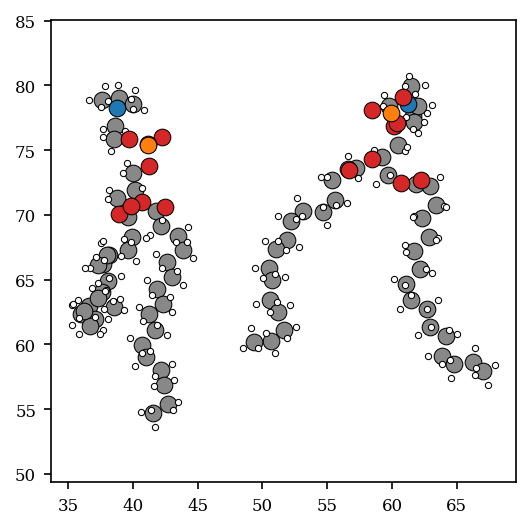

In [131]:
plt.figure(figsize=(4,4))
mcolors = {'H': 'w', 
           'C': '#888888', 
           'O': 'C3', 
           'N': 'C0',
           'P': 'C1'
          }
for atype in np.unique(dppc1.types):
    print(atype)
    theseatoms = u.select_atoms(f'resid 1 2 and type {atype}')
    ms = 8
    if atype=='H':
        ms = 3
    plt.plot(theseatoms.positions[:, 0], theseatoms.positions[:, 2], 'o', ms=ms, markeredgecolor='k',
             c=mcolors[atype], markeredgewidth=0.5)
plt.gca().set_aspect('equal', 'datalim')

plt.show()